# Chapter 4 - Inferences with Gaussians

In [1]:
import pyjags
from pjbcmassistant import model_handler
from pjbcmassistant import sample_handler


## 4.1 - Inferring a mean and standard deviation

In [2]:
spec = """
model:
Gaussian.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [1.1, 1.9, 2.3, 1.8]
n = len(x) 

sample:
mu
lambda
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [3]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
lambda,2.720301,2.718919,1.935255,11.537691,"[0.01, 10.05]","[0.052, 10.028]"
mu,1.792179,0.732432,1.780352,-4.592215,"[-0.675, 3.1]","[0.412, 3.096]"
sigma,1.054169,1.069213,0.718838,5.893258,"[0.201, 8.083]","[0.316, 4.376]"


all PSRF values < 1.05 | maximum PSRF: sigma at 1.0045342053461797.


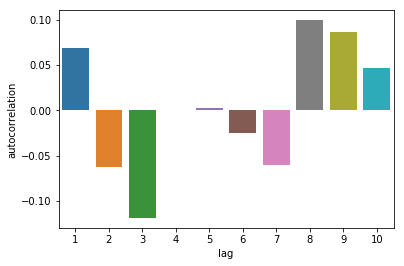

In [4]:
samplebuddy.diagnostic()
samplebuddy.autocorr('mu')

/home/isaiah/anaconda3/envs/pyjagsBCM/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


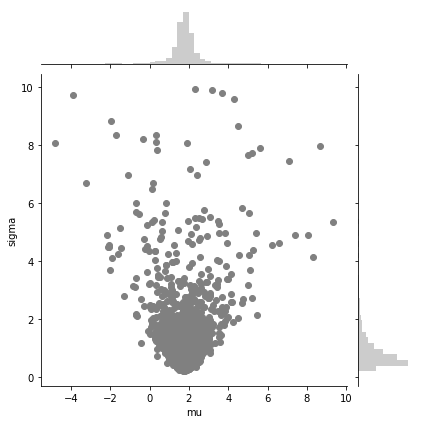

In [5]:
samplebuddy.vizjoint('mu','sigma')

## 4.2 - The Seven Scientists

In [6]:
spec = """
model:
SevenScientists.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
n = len(x)

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [7]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
mu,9.898707,0.281663,9.929477,3.684758,"[9.528, 10.121]","[9.562, 10.107]"
sigma_0,226.169314,1524.700995,55.914139,6526.297453,"[10.65, 696.508]","[16.554, 1269.385]"
sigma_1,34.296943,197.332334,9.631905,833.188020,"[0.045, 159.429]","[2.803, 178.163]"
sigma_2,14.395234,141.548459,2.400183,393.584710,"[0.041, 32.45]","[0.729, 57.447]"
sigma_3,1.070085,13.309051,0.137115,31.124839,"[0.015, 2.278]","[0.027, 4.087]"
sigma_4,3.008156,45.650599,0.478447,162.858254,"[0.023, 5.77]","[0.089, 10.073]"
sigma_5,0.704389,5.014603,0.128074,28.197558,"[0.013, 1.763]","[0.026, 3.765]"
sigma_6,2.209354,38.263475,0.210925,71.510585,"[0.015, 3.192]","[0.035, 5.255]"


all PSRF values < 1.05 | maximum PSRF: mu at 1.0023258021070984.


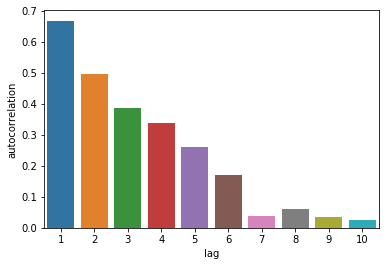

In [8]:
samplebuddy.diagnostic()
samplebuddy.autocorr('mu')

## 4.3 - Repeated measurement of IQ

In [15]:
spec = """
model:
IQ.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [[90,95,100],[105,110,115],[150,155,160]]
n, m = np.shape(x)

# this is an ugly way to do this, because we're "calling" a
# module (numpy) that we haven't actually imported... I'm sure there's
# a smart alternative, but I won't dwell on it just yet.

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

# modelbuddy.data['x'] = [[90,95,100],[105,110,115],[150,155,160]]

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [16]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
mu_0,94.914836,4.016343,95.014853,73.914689,"[78.45, 105.543]","[86.754, 103.145]"
mu_1,109.879894,3.975299,109.862878,87.818811,"[98.911, 118.957]","[101.89, 117.689]"
mu_2,154.788913,3.989842,154.917222,126.725662,"[143.233, 163.605]","[146.582, 162.873]"
sigma,6.398184,2.485741,5.827816,15.246855,"[2.743, 14.101]","[3.322, 12.839]"


all PSRF values < 1.05 | maximum PSRF: sigma at 1.0029985063228624.


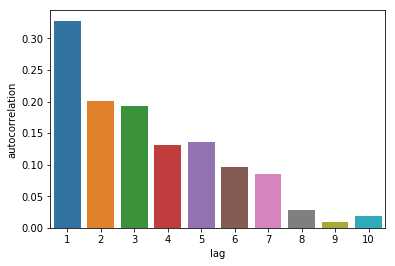

In [17]:
samplebuddy.diagnostic()
samplebuddy.autocorr('mu_1')